# Homework 3

## Akshay Prakash - arp3469

## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**


In [2]:
# Add your code or descriptions here 
sample = pd.read_csv("nonparticipants.csv")
participants = pd.read_csv("participants.csv")

In [3]:
len(participants)

25

In [4]:
len(sample)

22

In [5]:
participants

,participants
0,230.16
1,210.99
2,288.73
3,590.28
4,582.59
5,635.21
6,249.86
7,441.66
8,572.43
9,357.78


In [6]:
sample = pd.concat([sample, participants], axis = 1)
sample.head()

,nonparticipants,participants
0,614.61,230.16
1,503.46,210.99
2,425.22,288.73
3,688.77,590.28
4,184.00,582.59


In [7]:
sample

,nonparticipants,participants
0,614.61,230.16
1,503.46,210.99
2,425.22,288.73
3,688.77,590.28
4,184.00,582.59
5,299.73,635.21
6,350.65,249.86
7,394.94,441.66
8,261.55,572.43
9,295.28,357.78


In [8]:
# Sturge's Rule to calculate the number of intervals [1 + ln(n)/ln(2)]
1 + np.log([sample.size])/np.log([2])

array([6.64385619])

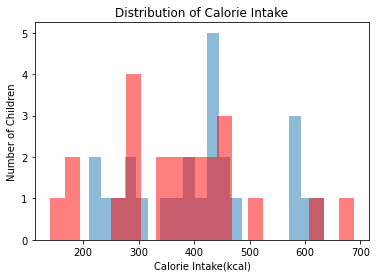

In [9]:
plt.hist(sample["participants"], bins = 20, alpha = 0.5)
plt.hist(sample["nonparticipants"], bins = 20, alpha = 0.5, facecolor = "r")
plt.title("Distribution of Calorie Intake")
plt.xlabel("Calorie Intake(kcal)")
plt.ylabel("Number of Children")
plt.show()

In [10]:
sample.describe()

,nonparticipants,participants
count,22.000000,25.000000
mean,374.071818,410.079600
std,133.139285,121.513786
min,139.690000,210.990000
25%,296.392500,298.380000
50%,374.740000,424.940000
75%,445.557500,456.300000
max,688.770000,635.210000


The data appears to be somewhat normally distributed across the two samples.

The meal preparation participant group has a mean calorie intake of <code>397 kcal</code>, which is greater than the mean of the nonparticipating group (<code>374 kcal</code>).

The nonparticipants have a lower minimum, <code>139.69 kcal</code>, and a higher maximum <code>688.77 kcal</code>, compared to the minimum and maximum values of the participating group <code>210.99 kcal and 635.21 kcal</code>, respectively). Accordingly, the standard deviation of the nonparticipant group is larger than that of the participant group.

# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


In [11]:
from scipy.stats import ttest_1samp

### 1. set up hypotheses and select alpha level
*H*<sub>0</sub> : $\mu = 425$ (mean difference in calorie intake is 0)

*H*<sub>1</sub> : $\mu \ne 425$ (mean difference in calorie intake is not 0)

$\alpha = 0.05$

### 2. select the appropriate test statistic
since $\ n = 25 < 30$, we will use the t-statistic for the "two-sided$\ t$-Test":$$ t = \frac{(\bar{x} - \mu)}{\frac{s }{ \sqrt{n}}} $$

### 3. state the decision rule

In [12]:
# determining the degrees of freedom
degrees_of_freedom = sample["participants"].size - 1
degrees_of_freedom

24

the critical value from the standard t-distribution associated with a right-hand tail probability of 
$\ \frac{\alpha}{2} = \frac{0.05}{2} = 0.025 $ based on $\ df = 24 $ is 2.064.

decision rule: reject$\ H_o$ if $\ |t| \ge 2.064 $, otherwise, do not reject $\ H_o $.

### 4. compute the test statistic and the associated p-value

In [13]:
t_stat, p_val = ttest_1samp(sample["participants"], popmean = 425)

In [14]:
(sample["participants"].mean() - 425) / (sample["participants"].std()/(np.sqrt(25)))

-0.6139385690489639

In [15]:
t_stat

-0.6139385690489593

In [16]:
p_val

0.5450319510318798

### 5. conclusion

fail to reject $\ H_o$ as 0.6139 is less than 2.064.

there is not significant evidence that the mean calorie consumption of those who participated in the meal preparation differs from 425. ($\ p = 0.545 $ )

# Question 3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

In [17]:
stats.t.interval(alpha = 0.90, df = degrees_of_freedom, \
                 loc = sample["participants"].mean(), \
                 scale = sample["participants"].sem())

(368.50044815647885, 451.65875184352086)

we are 90% confident that the true mean calorie intake for participants in the meal preparation program is between <code>368.500</code> and <code>451.659</code> (kcal).

# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

In [18]:
from scipy.stats import ttest_ind

### 1. set up the hypotheses and select the alpha level

$\ H_o$ : \$ \mu_1 = \mu_2$ the mean calories consumed by the participants and non-participants is the same.

$\ H_1$ : \$ \mu_1 > \mu_2$ the mean calories consumed by the participants is greater than than that of the non-participants.

$\ \alpha = 0.05$

### 2. select the appropriate test statistic

as $\ n = 22 < 30 $ , we will use the $\ t$ statistic for a two-sample \$ t$-test:

$$ t = \frac{ \bar{x}_1 - \bar{x}_2 } { \sqrt{ \frac{ s_1^2}{n_1} + \frac{ s_2^2}{n_2}}} $$

### 3. state the decision rule

In [19]:
# determining the degrees of freedom: 
# referencing the lecture slides, (Teymourian, K.(2021)"T Distribution, T-Test, Two-Sample T-Test" [PowerPoint slides] )
# "estimate the degrees of freedom by taking the minimum of the quantities n1 - 1 and n2 - 1"

degrees_Freedom = min(sample["participants"].size - 1, sample["nonparticipants"].dropna().size - 1)
degrees_Freedom

21

the critical value from the standard t-distribution table associated with a right-hand tail probability of $\ \alpha = 0.05 $ is 1.721.

decision rule: reject$\ H_0$ if $\ t \ge 1.721$, otherwise, fail to reject $\ H_0$

### 4. compute the test statistic and the associated p-value

In [20]:
ttest_ind(sample["participants"], sample["nonparticipants"].dropna(), alternative = "greater")

Ttest_indResult(statistic=0.9693504409241457, pvalue=0.1687759109713235)

### 5. conclusion

fail to reject$\ H_0$, as 0.969 is less than 1.721.

we do not have significant evidence at \$ \alpha = 0.05$ to conclude that mean calories consumed by participants of the meal preparation program was greater than that of the non-participants.